In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

In [2]:
ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\results")
eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\results")
ec_base_line_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\base_line")
eo_base_line_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\base_line")

In [3]:
ec_results = np.zeros(
    (   
        200,
        5,
        5
    )
)

In [4]:
eo_results = np.zeros(
    (   
        200,
        5,
        5
    )
)

In [5]:
ec_base_line = np.zeros(
    (   
        200,
        5
    )
)

In [6]:
eo_base_line = np.zeros(
    (   
        200,
        5
    )
)

In [7]:
for i, pth in enumerate(ec_folder.iterdir()):
    current = np.load(pth)
    ec_results[i, :, :] = current.copy()

In [8]:
for i, pth in enumerate(eo_folder.iterdir()):
    current = np.load(pth)
    eo_results[i, :, :] = current.copy()

In [9]:
for i, pth in enumerate(ec_base_line_folder.iterdir()):
    current = np.load(pth)
    ec_base_line[i, :] = current.copy()

In [10]:
for i, pth in enumerate(eo_base_line_folder.iterdir()):
    current = np.load(pth)
    eo_base_line[i, :] = current.copy()

In [11]:
results = ec_results.__add__(eo_results)/2

In [12]:
base_line = ec_base_line.__add__(eo_base_line)/2

In [13]:
print(np.argwhere(np.isnan(results)))
print(np.argwhere(np.isinf(results)))

[[ 69   2   1]
 [ 69   2   2]
 [ 69   2   3]
 [ 69   2   4]
 [ 70   2   1]
 [ 70   2   2]
 [ 70   2   3]
 [ 70   2   4]
 [106   2   1]
 [106   2   2]
 [106   2   3]
 [106   2   4]]
[]


In [14]:
results = np.delete(results, 69, axis=0)
results = np.delete(results, 69, axis=0)
results = np.delete(results, 104, axis=0)

base_line = np.delete(base_line, 69, axis=0)
base_line = np.delete(base_line, 69, axis=0)
base_line = np.delete(base_line, 104, axis=0)


In [15]:
print(base_line.size)
print(results.size)

985
4925


In [16]:
results[:, :, 2] -= results[:, :, 1]

In [17]:
base_line[:, 2] -= base_line[:, 1]

BASELINE PERFORMANCE

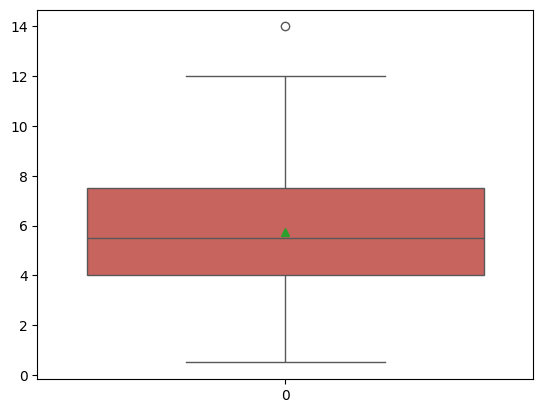

In [18]:
plot_n_boxplots([base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

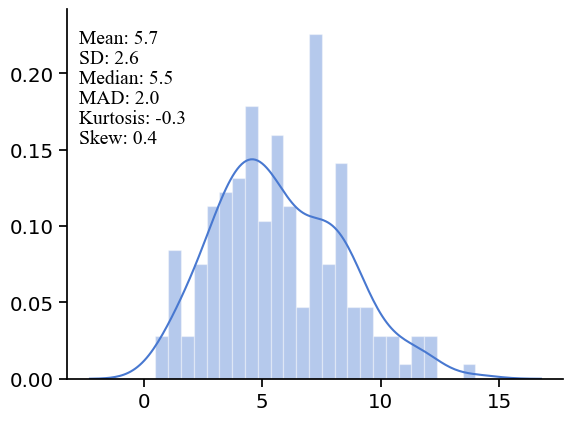

In [19]:
plot_dist_hist(base_line[:, 1])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_baseline")

In [20]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\base_line", base_line[:, 1])

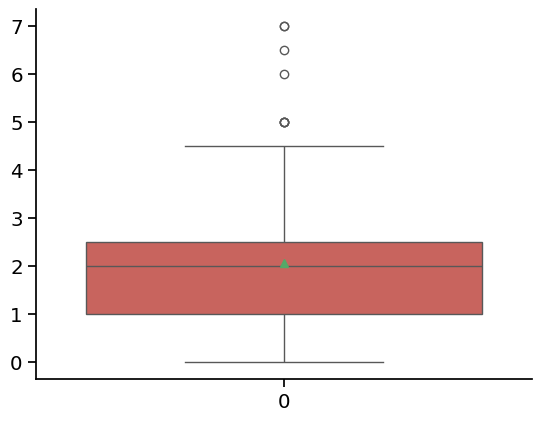

In [21]:
plot_n_boxplots([base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

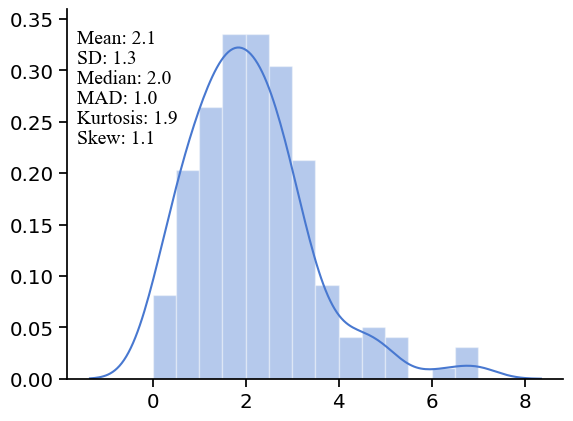

In [22]:
plot_dist_hist(base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_baseline")

In [23]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\base_line", base_line[:, 2])

THEN MY ALGORITHM

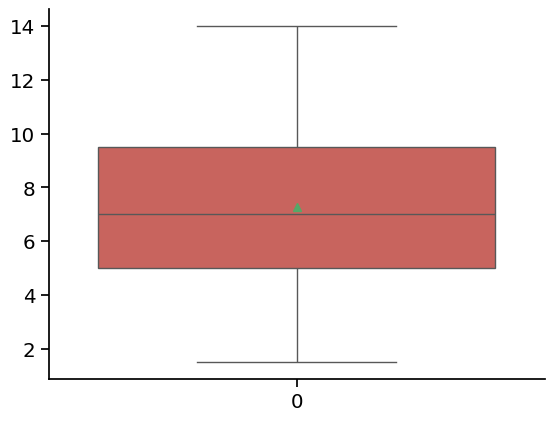

In [24]:
plot_n_boxplots([results[:, 0, 1].flatten()+base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

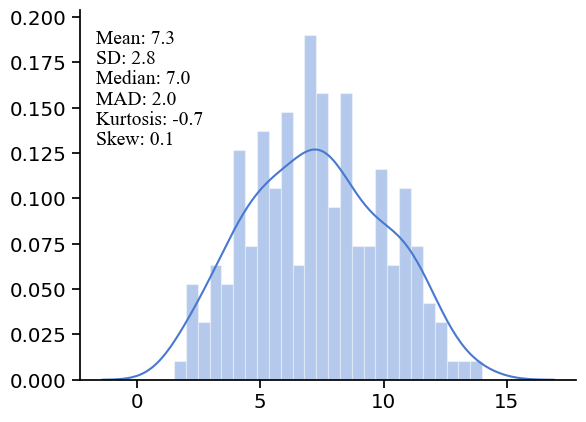

In [25]:
plot_dist_hist(results[:, 0, 1].flatten()+base_line[:, 1].flatten())
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_SDX")

In [26]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\mine", results[:, 0, 1]+base_line[:, 1])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\mine_ex", results[:, 0, 0])

In [35]:
print(results.shape)

(197, 5, 5)


BAD CHANNELS

In [28]:
my_heavy_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\bad_channels\my_heavy")
channels = []

In [29]:
for i, pth in enumerate((my_heavy_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())

In [77]:
channels = np.concatenate(channels)

ValueError: zero-dimensional arrays cannot be concatenated

In [31]:
unique, counts = np.unique(channels, return_counts=True)

In [32]:
print(len(counts))

56


In [34]:
count_dict = dict(zip(unique, counts))
#print(count_dict['P2'])
print(count_dict)

{'AF3': 46, 'AF4': 48, 'AF7': 131, 'AF8': 123, 'AFz': 24, 'C2': 1, 'C3': 11, 'C4': 16, 'C5': 60, 'C6': 43, 'CP1': 1, 'CP3': 4, 'CP4': 2, 'CP5': 21, 'CP6': 15, 'CPz': 1, 'F1': 1, 'F2': 4, 'F3': 24, 'F4': 26, 'F5': 64, 'F6': 64, 'F7': 100, 'F8': 100, 'FC2': 2, 'FC3': 15, 'FC4': 30, 'FC5': 68, 'FC6': 71, 'FT7': 82, 'FT8': 90, 'Fp1': 122, 'Fp2': 110, 'Fz': 1, 'O1': 50, 'O2': 49, 'Oz': 39, 'P1': 2, 'P2': 3, 'P4': 5, 'P5': 4, 'P6': 12, 'P7': 24, 'P8': 34, 'PO10': 84, 'PO3': 25, 'PO4': 26, 'PO7': 37, 'PO8': 65, 'PO9': 86, 'POz': 20, 'Pz': 1, 'T7': 104, 'T8': 97, 'TP7': 72, 'TP8': 41}


In [36]:
my_heavy_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\bad_channels\my_heavy")
channels = []

In [37]:
for i, pth in enumerate((my_heavy_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())

In [38]:
channels = np.concatenate(channels)

In [39]:
unique, counts = np.unique(channels, return_counts=True)

In [40]:
print(len(counts))

59


In [41]:
count_dict = dict(zip(unique, counts))
#print(count_dict['P2'])
print(count_dict)

{'AF3': 78, 'AF4': 77, 'AF7': 161, 'AF8': 147, 'AFz': 57, 'C2': 2, 'C3': 20, 'C4': 20, 'C5': 75, 'C6': 57, 'CP1': 1, 'CP3': 5, 'CP4': 4, 'CP5': 34, 'CP6': 14, 'CPz': 2, 'Cz': 2, 'F1': 16, 'F2': 13, 'F3': 47, 'F4': 46, 'F5': 95, 'F6': 79, 'F7': 115, 'F8': 128, 'FC1': 2, 'FC2': 4, 'FC3': 31, 'FC4': 33, 'FC5': 79, 'FC6': 89, 'FT7': 104, 'FT8': 107, 'Fp1': 154, 'Fp2': 147, 'Fz': 14, 'O1': 31, 'O2': 23, 'Oz': 21, 'P1': 1, 'P2': 4, 'P3': 1, 'P4': 1, 'P5': 6, 'P6': 7, 'P7': 25, 'P8': 24, 'PO10': 94, 'PO3': 9, 'PO4': 7, 'PO7': 31, 'PO8': 29, 'PO9': 87, 'POz': 7, 'Pz': 1, 'T7': 110, 'T8': 115, 'TP7': 84, 'TP8': 64}


SCENARIO 2

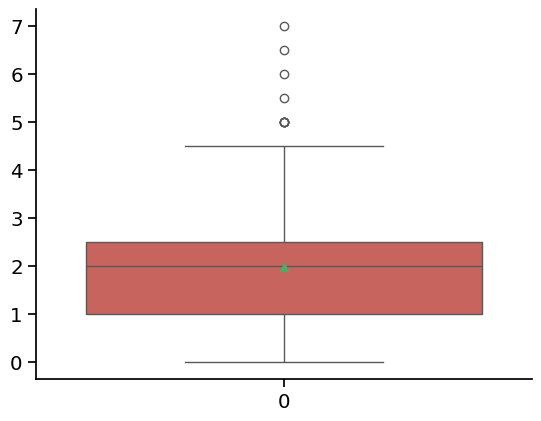

In [27]:
plot_n_boxplots([results[:, 1, 2].flatten()+base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

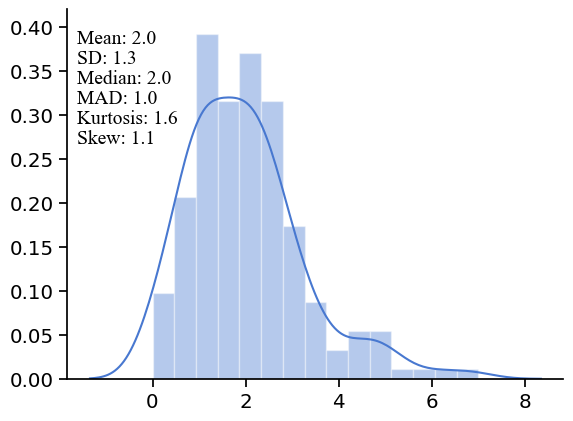

In [28]:
plot_dist_hist(results[:, 1, 2]+base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_SDX")

In [29]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\mine", results[:, 1, 2]+base_line[:, 2])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\mine_ex", results[:, 1, 0])

DROPPED CHANNELS

In [79]:
my_light_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\bad_channels\my_light")
channels = []
for i, pth in enumerate((my_light_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())
channels = np.concatenate(channels)
unique, counts = np.unique(channels, return_counts=True)
print(len(counts))
count_dict = dict(zip(unique, counts))
#print(count_dict['P2'])
print(count_dict)

30
{'AF7': 9, 'AF8': 5, 'C6': 3, 'CP1': 1, 'CP5': 2, 'CP6': 1, 'F5': 1, 'F6': 2, 'F7': 7, 'F8': 4, 'FC4': 1, 'FC5': 5, 'FC6': 6, 'FT7': 2, 'FT8': 4, 'Fp1': 5, 'Fp2': 3, 'O2': 1, 'Oz': 1, 'P5': 1, 'P8': 1, 'PO10': 17, 'PO4': 2, 'PO7': 1, 'PO8': 3, 'PO9': 7, 'T7': 17, 'T8': 8, 'TP7': 9, 'TP8': 1}


In [80]:
my_light_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\bad_channels\my_light")
channels = []
for i, pth in enumerate((my_light_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())
channels = np.concatenate(channels)
unique, counts = np.unique(channels, return_counts=True)
print(len(counts))
count_dict = dict(zip(unique, counts))
#print(count_dict['P2'])
print(count_dict)

30
{'AF4': 1, 'AF7': 13, 'AF8': 13, 'C2': 1, 'C5': 1, 'C6': 3, 'CP5': 1, 'F4': 2, 'F5': 4, 'F6': 10, 'F7': 9, 'F8': 4, 'FC4': 2, 'FC5': 3, 'FC6': 3, 'FT7': 8, 'FT8': 6, 'Fp1': 12, 'Fp2': 6, 'O1': 1, 'O2': 1, 'P7': 1, 'PO10': 11, 'PO7': 1, 'PO8': 1, 'PO9': 10, 'T7': 20, 'T8': 19, 'TP7': 9, 'TP8': 3}


AUTOREJECT

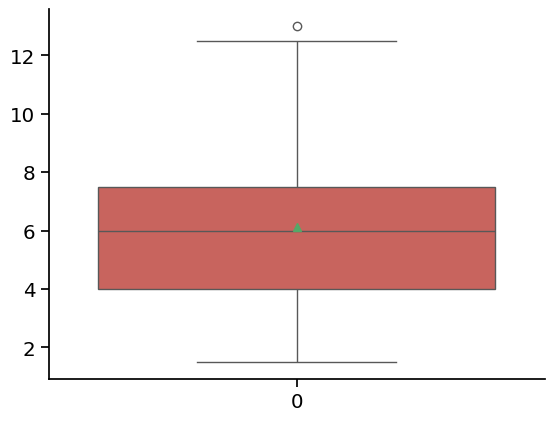

In [30]:
plot_n_boxplots([results[:, 2, 1].flatten()+base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

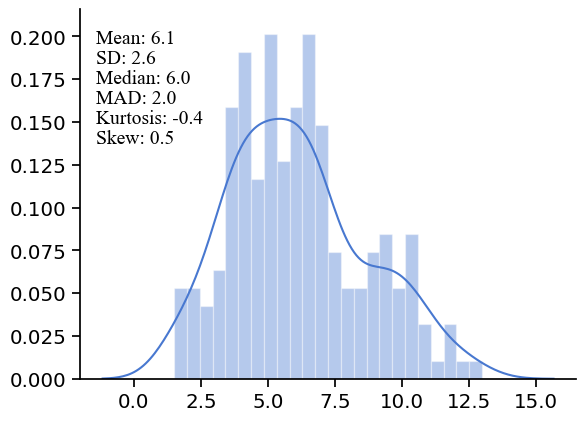

In [31]:
plot_dist_hist(results[:, 2, 1].flatten()+base_line[:, 1].flatten())
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_autoreject")

In [32]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\autorej", results[:, 2, 1] +base_line[:, 1])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\autorej_ex", results[:, 2, 0])

DROPPED CHANELS

In [44]:
heavy_auto_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\bad_channels\heavy_auto")
channels = []

In [45]:
for i, pth in enumerate((heavy_auto_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())

In [46]:
channels = np.concatenate(channels)

In [47]:
unique, counts = np.unique(channels, return_counts=True)

In [48]:
print(len(counts))

61


In [51]:
count_dict = dict(zip(unique, counts))
print(count_dict['FC6'])
print(count_dict)

47
{'AF3': 19, 'AF4': 26, 'AF7': 47, 'AF8': 41, 'AFz': 22, 'C1': 18, 'C2': 19, 'C3': 26, 'C4': 28, 'C5': 35, 'C6': 39, 'CP1': 17, 'CP2': 12, 'CP3': 26, 'CP4': 23, 'CP5': 21, 'CP6': 24, 'CPz': 29, 'Cz': 24, 'F1': 28, 'F2': 27, 'F3': 28, 'F4': 25, 'F5': 38, 'F6': 47, 'F7': 34, 'F8': 29, 'FC1': 32, 'FC2': 35, 'FC3': 35, 'FC4': 35, 'FC5': 49, 'FC6': 47, 'FT7': 22, 'FT8': 18, 'Fp1': 41, 'Fp2': 37, 'Fz': 31, 'O1': 39, 'O2': 37, 'Oz': 29, 'P1': 41, 'P2': 32, 'P3': 31, 'P4': 27, 'P5': 28, 'P6': 50, 'P7': 25, 'P8': 37, 'PO10': 18, 'PO3': 49, 'PO4': 45, 'PO7': 48, 'PO8': 58, 'PO9': 8, 'POz': 56, 'Pz': 40, 'T7': 49, 'T8': 47, 'TP7': 32, 'TP8': 23}


In [58]:
heavy_auto_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\bad_channels\heavy_auto")
channels = []

In [59]:
for i, pth in enumerate((heavy_auto_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())

In [60]:
channels = np.concatenate(channels)

In [61]:
unique, counts = np.unique(channels, return_counts=True)

In [62]:
print(len(counts))

61


In [63]:
count_dict = dict(zip(unique, counts))
print(count_dict['FC6'])
print(count_dict)

35
{'AF3': 48, 'AF4': 55, 'AF7': 65, 'AF8': 72, 'AFz': 37, 'C1': 26, 'C2': 15, 'C3': 31, 'C4': 30, 'C5': 41, 'C6': 39, 'CP1': 28, 'CP2': 22, 'CP3': 21, 'CP4': 37, 'CP5': 28, 'CP6': 24, 'CPz': 37, 'Cz': 27, 'F1': 36, 'F2': 24, 'F3': 48, 'F4': 32, 'F5': 77, 'F6': 69, 'F7': 37, 'F8': 32, 'FC1': 25, 'FC2': 17, 'FC3': 25, 'FC4': 14, 'FC5': 51, 'FC6': 35, 'FT7': 36, 'FT8': 26, 'Fp1': 54, 'Fp2': 55, 'Fz': 33, 'O1': 27, 'O2': 26, 'Oz': 28, 'P1': 38, 'P2': 33, 'P3': 24, 'P4': 36, 'P5': 26, 'P6': 37, 'P7': 26, 'P8': 37, 'PO10': 15, 'PO3': 35, 'PO4': 40, 'PO7': 40, 'PO8': 32, 'PO9': 11, 'POz': 40, 'Pz': 31, 'T7': 49, 'T8': 50, 'TP7': 46, 'TP8': 29}


SCENARIO 2

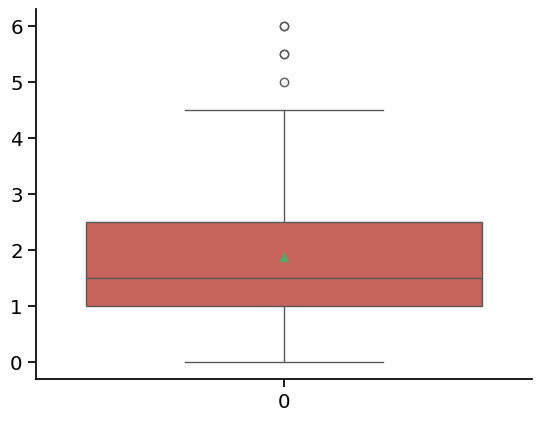

In [33]:
plot_n_boxplots([results[:, 3, 2].flatten()+base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

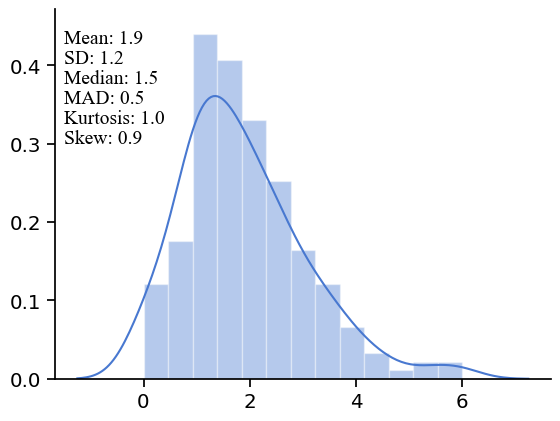

In [34]:
plot_dist_hist(results[:, 3, 2]+base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_autoreject")

In [35]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\autorej", results[:, 3, 2]+base_line[:, 2])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\autorej_ex", results[:, 3, 0])

In [ ]:
#DROPPED CHANNELS

In [82]:
light_auto_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\bad_channels\light_auto")
channels = []
for i, pth in enumerate((light_auto_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())
channels = np.concatenate(channels)
unique, counts = np.unique(channels, return_counts=True)
print(len(counts))
count_dict = dict(zip(unique, counts))
print(count_dict['Pz'])
print(count_dict)

61
30
{'AF3': 16, 'AF4': 14, 'AF7': 30, 'AF8': 30, 'AFz': 16, 'C1': 19, 'C2': 14, 'C3': 28, 'C4': 18, 'C5': 21, 'C6': 29, 'CP1': 20, 'CP2': 20, 'CP3': 19, 'CP4': 19, 'CP5': 11, 'CP6': 9, 'CPz': 31, 'Cz': 17, 'F1': 16, 'F2': 12, 'F3': 19, 'F4': 18, 'F5': 30, 'F6': 32, 'F7': 29, 'F8': 26, 'FC1': 8, 'FC2': 12, 'FC3': 15, 'FC4': 13, 'FC5': 24, 'FC6': 37, 'FT7': 16, 'FT8': 13, 'Fp1': 34, 'Fp2': 22, 'Fz': 22, 'O1': 21, 'O2': 29, 'Oz': 20, 'P1': 21, 'P2': 25, 'P3': 24, 'P4': 21, 'P5': 13, 'P6': 35, 'P7': 20, 'P8': 21, 'PO10': 15, 'PO3': 32, 'PO4': 32, 'PO7': 30, 'PO8': 39, 'PO9': 7, 'POz': 29, 'Pz': 30, 'T7': 33, 'T8': 31, 'TP7': 21, 'TP8': 18}


In [83]:
light_auto_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\bad_channels\light_auto")
channels = []
for i, pth in enumerate((light_auto_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())
channels = np.concatenate(channels)
unique, counts = np.unique(channels, return_counts=True)
print(len(counts))
count_dict = dict(zip(unique, counts))
print(count_dict['Pz'])
print(count_dict)

61
29
{'AF3': 33, 'AF4': 39, 'AF7': 52, 'AF8': 46, 'AFz': 29, 'C1': 11, 'C2': 17, 'C3': 21, 'C4': 29, 'C5': 29, 'C6': 23, 'CP1': 20, 'CP2': 17, 'CP3': 13, 'CP4': 24, 'CP5': 11, 'CP6': 21, 'CPz': 22, 'Cz': 18, 'F1': 25, 'F2': 24, 'F3': 30, 'F4': 29, 'F5': 47, 'F6': 49, 'F7': 20, 'F8': 22, 'FC1': 8, 'FC2': 6, 'FC3': 15, 'FC4': 15, 'FC5': 35, 'FC6': 34, 'FT7': 19, 'FT8': 14, 'Fp1': 38, 'Fp2': 42, 'Fz': 35, 'O1': 10, 'O2': 16, 'Oz': 12, 'P1': 18, 'P2': 26, 'P3': 11, 'P4': 21, 'P5': 8, 'P6': 19, 'P7': 17, 'P8': 14, 'PO10': 9, 'PO3': 14, 'PO4': 13, 'PO7': 9, 'PO8': 23, 'PO9': 9, 'POz': 32, 'Pz': 29, 'T7': 38, 'T8': 30, 'TP7': 24, 'TP8': 18}


PREP

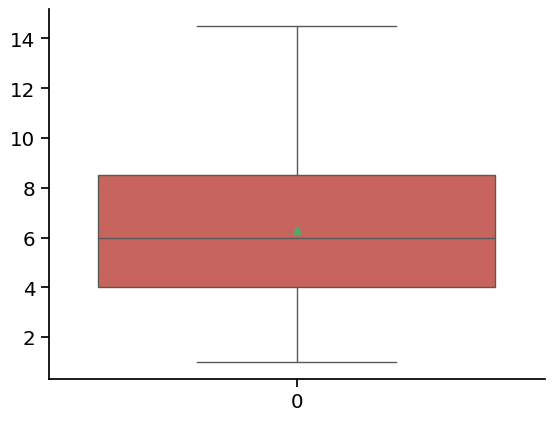

In [36]:
plot_n_boxplots([results[:, 4, 1].flatten()+base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

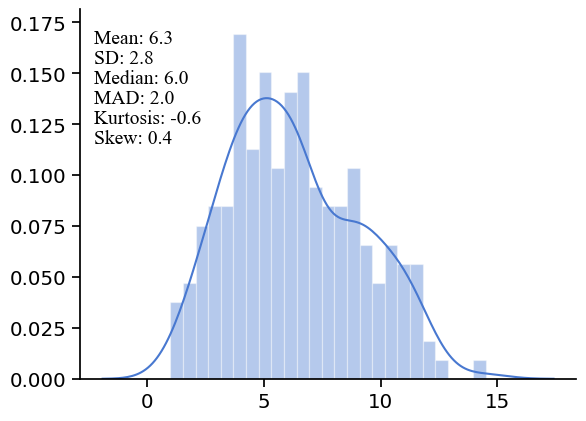

In [37]:
plot_dist_hist(results[:, 4, 1].flatten()+base_line[:, 1])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_prep")

In [38]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\prep", results[:, 4, 1]+base_line[:, 1])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\prep_ex", results[:, 4, 0])

DROPPED CHANNELS

In [64]:
prep_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\bad_channels\prep_mat")
channels = []

In [65]:
for i, pth in enumerate((prep_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())

In [66]:
channels = np.concatenate(channels)

In [67]:
unique, counts = np.unique(channels, return_counts=True)

In [68]:
print(len(counts))

57


In [70]:
count_dict = dict(zip(unique, counts))
#print(count_dict['Pz'])
print(count_dict)

KeyError: 'Pz'

In [71]:
prep_channels = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\bad_channels\prep_mat")
channels = []

In [72]:
for i, pth in enumerate((prep_channels).iterdir()):
    current = np.load(pth)
    channels.append(current.copy())

In [73]:
channels = np.concatenate(channels)

In [74]:
unique, counts = np.unique(channels, return_counts=True)

In [75]:
print(len(counts))

59


In [76]:
count_dict = dict(zip(unique, counts))
#print(count_dict['Pz'])
print(count_dict)

{'AF3': 7, 'AF4': 10, 'AF7': 44, 'AF8': 33, 'AFz': 3, 'C1': 3, 'C2': 2, 'C3': 6, 'C4': 8, 'C5': 23, 'C6': 21, 'CP1': 3, 'CP2': 4, 'CP3': 5, 'CP4': 3, 'CP5': 9, 'CP6': 11, 'CPz': 4, 'Cz': 6, 'F1': 3, 'F2': 2, 'F3': 6, 'F4': 3, 'F5': 28, 'F6': 34, 'F7': 36, 'F8': 37, 'FC1': 7, 'FC2': 7, 'FC3': 10, 'FC4': 16, 'FC5': 44, 'FC6': 48, 'FT7': 78, 'FT8': 63, 'Fp1': 33, 'Fp2': 33, 'Fz': 4, 'O1': 9, 'O2': 6, 'Oz': 9, 'P1': 4, 'P2': 1, 'P3': 1, 'P5': 1, 'P6': 1, 'P7': 4, 'P8': 1, 'PO10': 35, 'PO4': 1, 'PO7': 4, 'PO8': 6, 'PO9': 27, 'POz': 1, 'Pz': 2, 'T7': 64, 'T8': 54, 'TP7': 29, 'TP8': 8}


SCENARIO 2

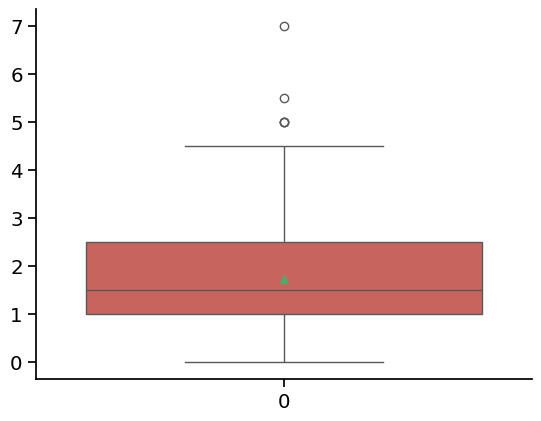

In [39]:
plot_n_boxplots([results[:, 4, 2].flatten()+base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

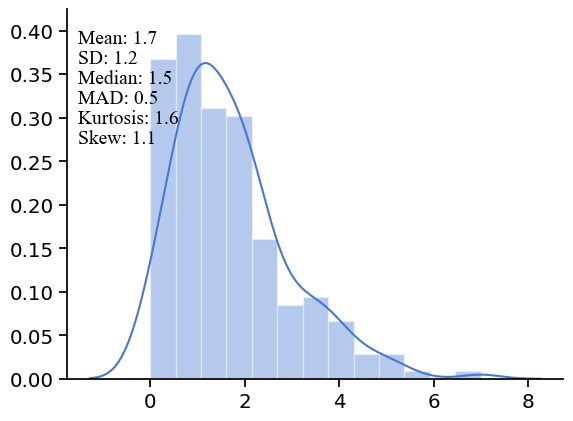

In [40]:
plot_dist_hist(results[:, 4, 2].flatten()+base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_prep")

In [41]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\prep", results[:, 4, 2]+base_line[:, 2])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\prep_ex", results[:, 4, 0])

Beautiful box plots